<a href="https://colab.research.google.com/github/JhonnyLimachi/IA_en_Salud/blob/main/9_Escalado_de_caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **ANALISIS DE DATOS**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Escalado de características

A estas alturas del curso, es probable que haya tenido varias nociones sobre cómo las variables a diferentes escalas pueden afectar a su modelo.

Términos como estandarización, normalización, misma escala y magnitud son muy importantes para el científico de datos. Dependiendo del algoritmo que elijas, el resultado puede verse muy comprometido.

<center><img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/magnitude.jpeg" width="40%"></center>

La realidad es que sí, la inmensa mayoría de las veces, estarás tratando con variables de diferentes tipos y diferentes escalas. Profundizar en el tema de esta lección es importante. Sin embargo, no te limites sólo a este cuaderno o a lo mencionado en el vídeo. **¡Usa las referencias y los enlaces!
<center><img src="https://images.unsplash.com/photo-1604247416063-e0e6aaf47b0b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="40%"></center>

**¿Cuándo utilizar técnicas de escalado de características?

En pocas palabras, querrás usar feature scaling cuando trabajes con algoritmos basados en **descenso de gradiente** o algoritmos basados en **distancia**.

Los algoritmos basados en el gradiente actualizan sus parámetros individualmente. En otras palabras, las diferentes escalas supondrán una gran diferencia.

Del mismo modo, los algoritmos basados en la distancia utilizan la distancia entre puntos (datos) para establecer el grado de similitud. Las magnitudes extremas harán que el algoritmo favorezca determinadas características desde el primer momento en que entre en contacto con ellas.

**¿Qué ocurre con los algoritmos basados en árboles?**

Los algoritmos basados en árboles son insensibles a las diferentes escalas de las características. Esto se debe a que crean nodos de decisión basados únicamente en cada característica de forma aislada.

Traducción realizada con la versión gratuita del traductor DeepL.com

## Estandarización

La estandarización se produce cuando las características sufren un cambio de escala y pasan a tener las propiedades de una distribución normal con media $\mu = 0$ y desviación típica $\sigma = 1$.

En la estandarización, las puntuaciones z se calculan de la siguiente manera:

$$
z = \frac{x - \mu}{\sigma}
$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/wine_data.csv", header=None)
df = df.iloc[:,0:3].copy()
df.columns = ['Label', 'Alcohol', 'MalicAcid'
]

df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


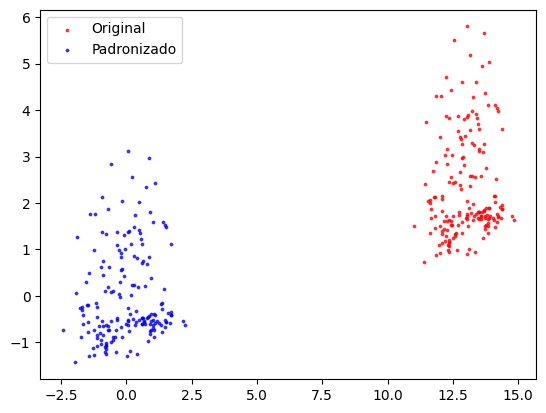

In [2]:
# estandarización
std = StandardScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

## Normalización

Básicamente, la normalización coloca los datos en una escala $[0, 1]$. Aunque no es la única forma de normalización, lo más común es utilizar la escala $$Mín-Máx$$, que se calcula de la siguiente manera:

$$
X_{norm} = \frac{X - X_{min}}{X_{max}} - X_{min}}
$$

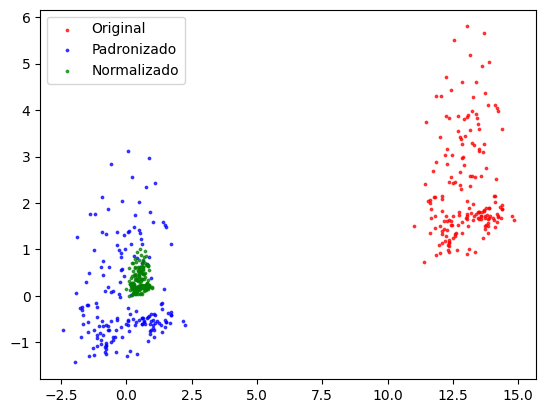

In [3]:
# Estandarización
minmax = MinMaxScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
ax.scatter(minmax[:,0], minmax[:,1], c='green', s=3, label='Normalizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

**¿Cuándo estandarizar o normalizar?**

No existe una respuesta única y evidente. Depende mucho del algoritmo, la aplicación y los datos que se utilicen.

He aquí algunos ejemplos:
* La normalización es esencial en el análisis de conglomerados, ya que la similitud de las características se compara utilizando distancias.
* La normalización es más deseable en PCA porque maximiza la varianza.
* Las imágenes RGB, con una escala original entre 0 y 255, deberían llevar la intensidad de este píxel a valores entre 0 y 1, es decir, preferimos normalizar los valores.
* Las redes neuronales suelen esperar valores normalizados entre 0 y 1.
* La normalización es mucho más sensible a la presencia de valores atípicos.

## Ejemplo visual

Fuente: [Documentação do Scikit-Learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)

In [14]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


HTTPError: HTTP Error 403: Forbidden

In [9]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

### Dados Originales

In [10]:
make_plot(0)

NameError: name 'distributions' is not defined

### StandardScaler

In [11]:
make_plot(1)

NameError: name 'distributions' is not defined

### MinMaxScaler

In [13]:
make_plot(2)

NameError: name 'distributions' is not defined

### PowerTransformer

In [15]:
make_plot(5)
make_plot(6)

NameError: name 'distributions' is not defined

### QuantileTransformer (uniform output)